In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , classification_report
import os

In [5]:
os.chdir('D:\meridianthe4\PML\Cases')
wisconsin = pd.read_csv('Wisconsin/BreastCancer.csv')
wisconsin.head()

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_9240\2347014255.py:1: SyntaxWarning: invalid escape sequence '\m'
  os.chdir('D:\meridianthe4\PML\Cases')


,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wisconsin['Class'] = le.fit_transform(wisconsin['Class'])

wisconsin.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,0
1,63375,9,1,2,6,4,10,7,7,2,1
2,76389,10,4,7,2,2,8,6,1,1,1
3,95719,6,10,10,10,8,10,7,10,7,1
4,128059,1,1,1,1,2,5,5,1,1,0


In [7]:
X=wisconsin.drop(['Class','Code'],axis=1)
y=wisconsin['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

In [8]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
# lr.predict_proba(X_test)
lr.intercept_,lr.coef_

X_test.shape

(210, 9)

In [9]:
y_pred_prob=lr.predict_proba(X_test)
y_pred_prob

array([[9.98120767e-01, 1.87923285e-03],
       [9.98229749e-01, 1.77025092e-03],
       [1.96481629e-04, 9.99803518e-01],
       [9.82482033e-01, 1.75179672e-02],
       [9.94408267e-01, 5.59173308e-03],
       [5.51665724e-01, 4.48334276e-01],
       [2.05397996e-03, 9.97946020e-01],
       [9.76178351e-01, 2.38216491e-02],
       [9.98597104e-01, 1.40289575e-03],
       [9.96557412e-01, 3.44258849e-03],
       [9.99275706e-01, 7.24293521e-04],
       [9.98134279e-01, 1.86572114e-03],
       [5.46197681e-04, 9.99453802e-01],
       [9.89788038e-01, 1.02119620e-02],
       [9.89788038e-01, 1.02119620e-02],
       [9.98903064e-01, 1.09693596e-03],
       [1.16178478e-01, 8.83821522e-01],
       [9.98911740e-01, 1.08825963e-03],
       [9.98911740e-01, 1.08825963e-03],
       [9.90375598e-01, 9.62440163e-03],
       [9.96542540e-01, 3.45746032e-03],
       [7.31077129e-01, 2.68922871e-01],
       [4.51767821e-04, 9.99548232e-01],
       [4.26536006e-02, 9.57346399e-01],
       [9.958841

In [10]:
X_test

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses
205,2,1,1,1,2,1,2,1,1
432,3,1,1,1,2,1,1,1,1
613,10,6,6,2,4,10,9,7,1
647,5,1,1,1,2,1,3,1,1
523,4,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
666,5,2,4,1,1,1,1,1,1
483,8,10,10,10,5,10,8,10,6
626,4,4,2,1,2,5,2,1,2
90,1,1,1,3,2,1,1,1,1


In [11]:
y_test

205    0
432    0
613    1
647    0
523    0
      ..
666    0
483    1
626    0
90     0
466    0
Name: Class, Length: 210, dtype: int64

In [12]:
lr.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [13]:
# from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)
# print(confusion_matrix(y_test, y_pred))


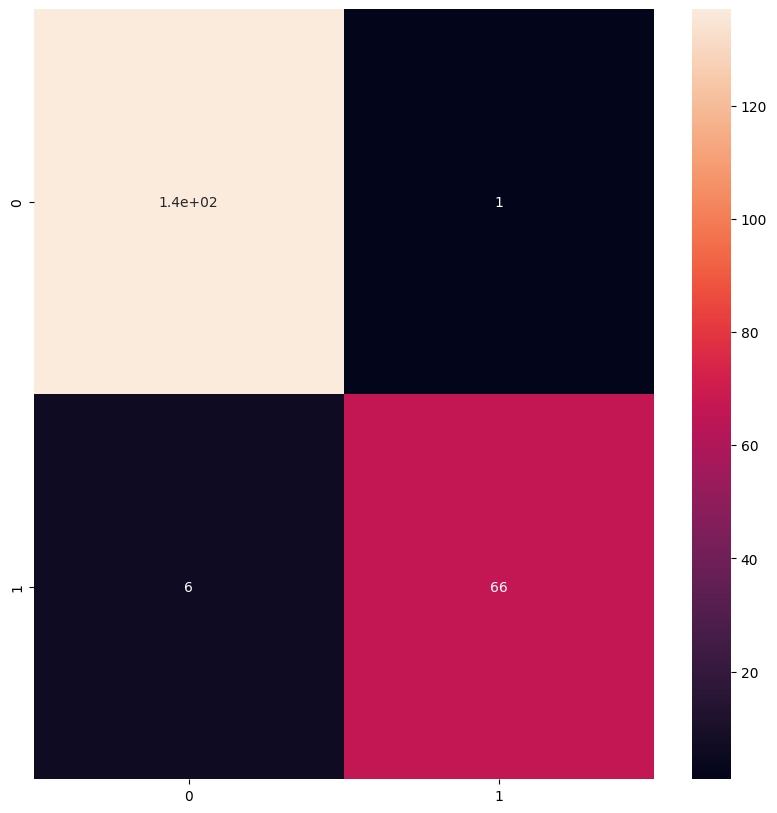

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,lr.predict(X_test))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,lr.predict(X_test)),annot=True)
plt.show()

In [15]:
accuracy_score(y_test,lr.predict(X_test))

0.9666666666666667

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict_proba(X_test)

array([[9.98120767e-01, 1.87923285e-03],
       [9.98229749e-01, 1.77025092e-03],
       [1.96481629e-04, 9.99803518e-01],
       [9.82482033e-01, 1.75179672e-02],
       [9.94408267e-01, 5.59173308e-03],
       [5.51665724e-01, 4.48334276e-01],
       [2.05397996e-03, 9.97946020e-01],
       [9.76178351e-01, 2.38216491e-02],
       [9.98597104e-01, 1.40289575e-03],
       [9.96557412e-01, 3.44258849e-03],
       [9.99275706e-01, 7.24293521e-04],
       [9.98134279e-01, 1.86572114e-03],
       [5.46197681e-04, 9.99453802e-01],
       [9.89788038e-01, 1.02119620e-02],
       [9.89788038e-01, 1.02119620e-02],
       [9.98903064e-01, 1.09693596e-03],
       [1.16178478e-01, 8.83821522e-01],
       [9.98911740e-01, 1.08825963e-03],
       [9.98911740e-01, 1.08825963e-03],
       [9.90375598e-01, 9.62440163e-03],
       [9.96542540e-01, 3.45746032e-03],
       [7.31077129e-01, 2.68922871e-01],
       [4.51767821e-04, 9.99548232e-01],
       [4.26536006e-02, 9.57346399e-01],
       [9.958841

In [17]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       138
           1       0.99      0.92      0.95        72

    accuracy                           0.97       210
   macro avg       0.97      0.95      0.96       210
weighted avg       0.97      0.97      0.97       210



In [18]:
confusion_matrix(y_test,lr.predict(X_test))

array([[137,   1],
       [  6,  66]])

In [19]:
from sklearn.metrics import roc_curve

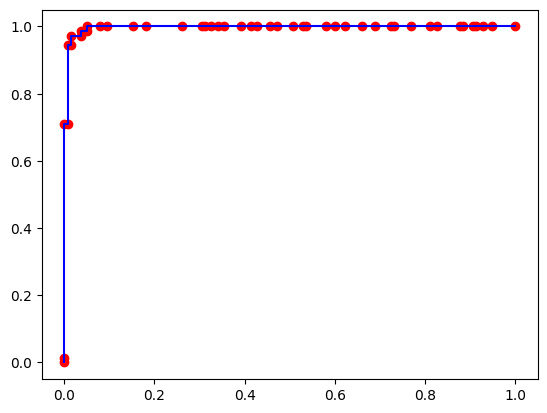

In [20]:
fpr, tpr, thres = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.scatter(fpr, tpr, c='red')
plt.plot(fpr, tpr, c='blue')
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [25]:
roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.9966787439613526

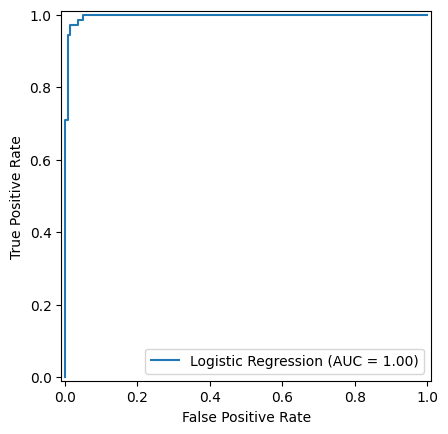

In [24]:
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]), name='Logistic Regression')
disp.plot()
plt.show()

# Human Resource Analysis

In [20]:
hr = pd.read_csv("D:\\meridianthe4\\PML\\Cases\\HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

In [22]:
X , y = hr.drop('left',axis=1) , hr['left']
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
col_transformer = ColumnTransformer([("OHE", ohe, make_column_selector(dtype_include=object))], 
                                    remainder='passthrough', 
                                    verbose_feature_names_out=False)
col_transformer = col_transformer.set_output(transform="pandas")
X = col_transformer.fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

In [23]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3429
           1       0.64      0.37      0.47      1070

    accuracy                           0.80      4499
   macro avg       0.73      0.65      0.68      4499
weighted avg       0.78      0.80      0.78      4499



In [24]:
lr = LogisticRegression(solver='lbfgs', penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3429
           1       0.65      0.41      0.50      1070

    accuracy                           0.81      4499
   macro avg       0.74      0.67      0.69      4499
weighted avg       0.79      0.81      0.79      4499



d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
solvers = ['newton-cg', 'lbfgs', 'newton-cholesky', 'sag', 'saga']
penalties = ['l2',None]

scores = []

for s in solvers:
    for p in penalties:
        try:
            lr = LogisticRegression(solver=s, penalty=p)
            lr.fit(X_train, y_train)
            y_pred = lr.predict(X_test)
            score = accuracy_score(y_test,y_pred)
            scores.append([s,p,score])
        except:
            continue

df_scores = pd.DataFrame(scores,columns=['Solver','Penalty','Score'])
df_scores.sort_values(by='Score',ascending=False)

d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

,Solver,Penalty,Score
3,lbfgs,None,0.808846
2,lbfgs,l2,0.806846
0,newton-cg,l2,0.799289
1,newton-cg,None,0.799066
4,newton-cholesky,l2,0.799066
5,newton-cholesky,None,0.799066
9,saga,None,0.757724
8,saga,l2,0.757724
7,sag,None,0.750834
6,sag,l2,0.750611
